<a href="https://colab.research.google.com/github/vahidseydi/Regression/blob/master/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Class -- session 2 --  multiple regression model 
# $ y_i = \Sigma _{d=i} ^{D} h_d(x_i) \times w_d + \epsilon_i$
# $ Y = H \times w + \epsilon $
## approach 1 : close form
##approach 2 : hill climbing (gradient steepest descent) 

## Dataset: House price prediction


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
import warnings
warnings.simplefilter("ignore")

#Load dataset

In [65]:
data_set_path='https://raw.githubusercontent.com/vahidseydi/Regression/master/kc_house_data.csv'
data=pd.read_csv(data_set_path)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Separate inputs and target

In [4]:
Y=data['price']
X=data
X=X.drop(['price'],axis=1)
X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# feature extractor!
## just select some features among inputs

In [0]:
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built']
H=X[features]

#add  $h_0(x)=1$  to  the features

In [6]:
H['intersept']=1
H.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,intersept
0,3,1.00,1180,5650,1.0,1955,1
1,3,2.25,2570,7242,2.0,1951,1
2,2,1.00,770,10000,1.0,1933,1
3,4,3.00,1960,5000,1.0,1965,1
4,3,2.00,1680,8080,1.0,1987,1


# print some dimensions

In [7]:
d=X.shape[1]
D=H.shape[1]
N=len(H)
print('number of inputs(d)=%d,   number of features(D)=%d,   number of data(N)=%d'%(d,D,N))

number of inputs(d)=20,   number of features(D)=7,   number of data(N)=21613


# approach 1 : close form
# $w=(H^T H)^{-1}H^TY$

cast H from dataframe to matrix

In [8]:
H=np.matrix(H)
H.shape


(21613, 7)

*cast Y from Series to vector*

In [9]:
Y=np.array(Y)
Y=Y.reshape((len(Y),1))
Y.shape

(21613, 1)

get transpose from H

In [10]:
HT=H.T
HT.shape

(7, 21613)

# $(H^T H)$

In [11]:
temp1=HT*H
temp1.shape

(7, 7)

# $(H^T H)^{-1}$

In [12]:
temp2=temp1.I
temp2.shape

(7, 7)

# $(H^T H)^{-1}H^T$

In [13]:
temp3=temp2*HT
temp3.shape

(7, 21613)

# $(H^T H)^{-1}H^TY$

In [14]:
w=temp3*Y
w.shape

(7, 1)

In [15]:
print(w)

[[-6.84857047e+04]
 [ 6.75144335e+04]
 [ 3.03211017e+02]
 [-2.98319830e-01]
 [ 5.39815181e+04]
 [-3.36495113e+03]
 [ 6.55369505e+06]]


# predict based on model

In [0]:
Y_hat = H*w

# Residual sum of squers

In [17]:
RSS=(Y-Y_hat).T*(Y-Y_hat)
print(RSS)

[[1.29266065e+15]]


# plot $\log(1+w)$ (just for better visualization) 
## <font color='blue'>blue </font> for positive weights
## <font color='red'>red </font> for negative weights



<BarContainer object of 7 artists>

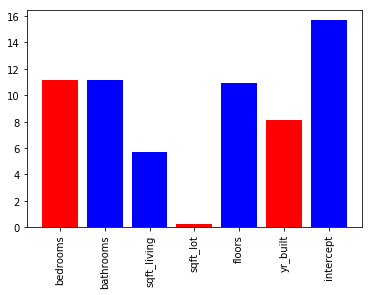

In [64]:
ploted_w=np.log(np.array(abs(w[:,0])).flatten()+1)
plt.xticks(rotation=90)
color=['b' if s>0 else 'r' for s in w]
ploted_features=features.copy()
ploted_features.append('intercept')
plt.bar(ploted_features,ploted_w,color=color)
